In [7]:
import json
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# UFO JSON 파일 불러오기
with open('/data/ephemeral/home/data/chinese_receipt/ufo/train.json', 'r', encoding='utf-8') as f:
    data = json.load(f)


In [ ]:
# UFO format 데이터로 bounding box 시각화 코드 
def image_visualization() :
    image_key =  random.choice(list(data['images'].keys()))
    image_data = data['images'][image_key]
    img_path = f"/data/ephemeral/home/data/chinese_receipt/img/train/{image_key}"  # 실제 이미지 경로로 업데이트
    img = cv2.imread(img_path)
    plt.figure(figsize=(20,15))
    if img is None:
        print("이미지를 불러올 수 없습니다. 경로를 확인해주세요:", img_path)
        return
    
    # 경계 상자 그리기
    for word_id, word_data in image_data['words'].items():
        points = word_data['points']
        
        # 그리기용 정수 좌표로 변환
        pts = np.array(points, np.int32).reshape((-1, 1, 2))
        
        # 경계 상자 폴리곤 그리기
        cv2.polylines(img, [pts], isClosed=True, color=(255,0, 0), thickness=2)
        
        
   
    # 이미지를 RGB로 변환 후 matplotlib으로 표시
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    
    

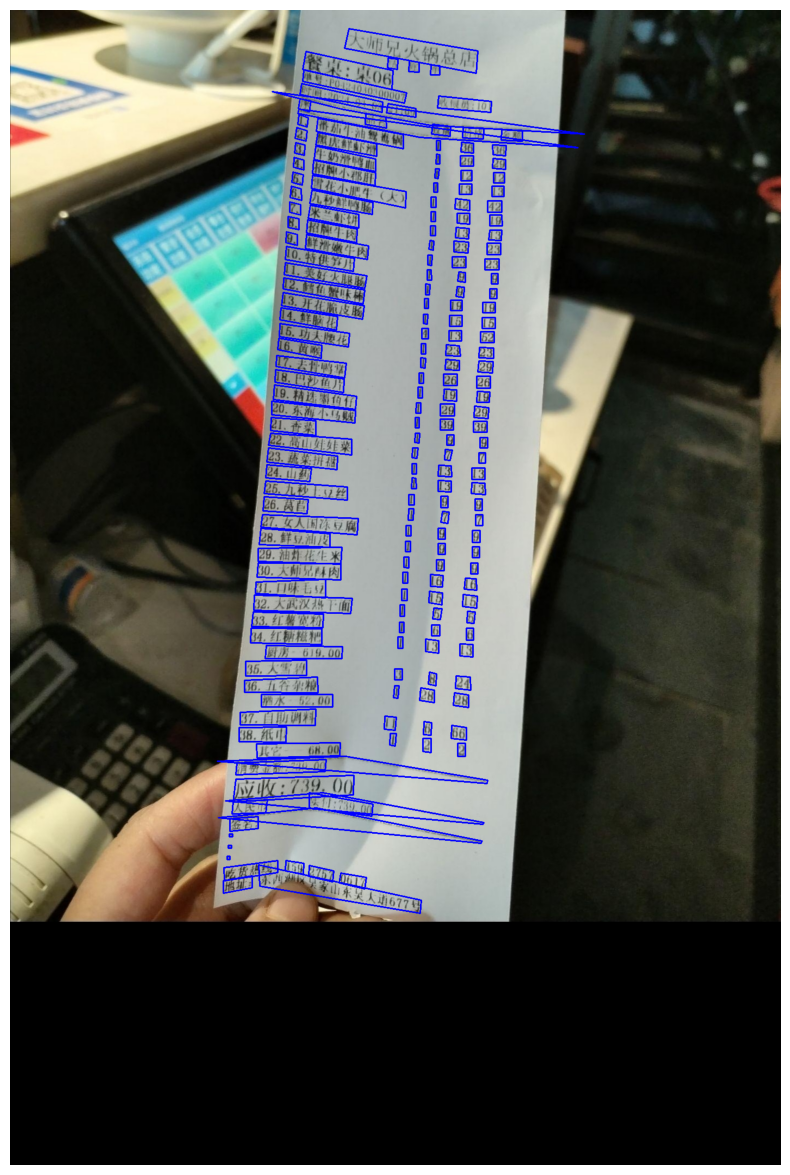

In [6]:
image_visualization()

In [ ]:
# COCO JSON 파일 불러오기
with open('/data/ephemeral/home/data/chinese_receipt/coco/train.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [ ]:
# COCO segmentation 좌표를 이용한 시각화 
def coco_segmentation_visualization():
    # 이미지 로드
    image_id = 1
    image_data = data['images'][image_id - 1]
    print(image_data)
    img_path = f"/data/ephemeral/home/data/chinese_receipt/img/train/{image_data['file_name']}"  # 실제 이미지 경로로 업데이트
    img = cv2.imread(img_path)
    plt.figure(figsize=(20, 15))
    if img is None:
        print("이미지를 불러올 수 없습니다. 경로를 확인해주세요:", img_path)
        return
    
    # 해당 image_id에 대한 주석 필터링
    annotations = [ann for ann in data['annotations'] if ann['image_id'] == image_id]
    # 세그멘테이션 폴리곤 그리기
    for annotation in annotations:
        print(annotation['segmentation'])
        for seg in annotation['segmentation']:
            points = np.array(seg, np.int32).reshape((-1, 1, 2))
            cv2.polylines(img, [points], isClosed=True, color=(255, 0, 0), thickness=2)

    # matplotlib을 위해 RGB로 변환 후 표시
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    

{'id': 1, 'file_name': 'extractor.zh.in_house.appen_000692_page0001.jpg', 'width': 1280, 'height': 1707, 'date_captured': '2024-05-30', 'tags': []}
[[309.567218, 349.305754, 619.610845, 370.931142, 615.564733, 414.860354, 301.70207, 392.895748]]
[[793.831838, 496.390348, 793.044708, 527.117863, 184.65742624018327, 503.11929087064794, 190.087026, 457.526945]]
[[189.480248, 503.080814, 301.100791, 514.58985, 297.422507, 561.356595, 186.095156, 553.010931]]
[[330.809304, 522.45159, 554.768347, 540.138418, 549.299335, 575.629057, 326.375852, 562.407534]]
[[188.740037, 561.193142, 403.646993, 584.465469, 398.139507, 627.28969, 183.485347, 607.052259]]
[[189.695436, 618.517038, 343.371168, 634.585292, 339.423241, 683.037121, 186.351542, 665.331553]]
[[372.17359, 639.538698, 697.134209, 659.900162, 693.955121, 698.685032, 367.850653, 679.599758]]
[[184.997298, 675.091436, 292.668027, 685.858508, 289.079003, 734.669239, 180.848216, 723.35124]]
[[321.095307, 691.412137, 575.465893, 709.838826, 

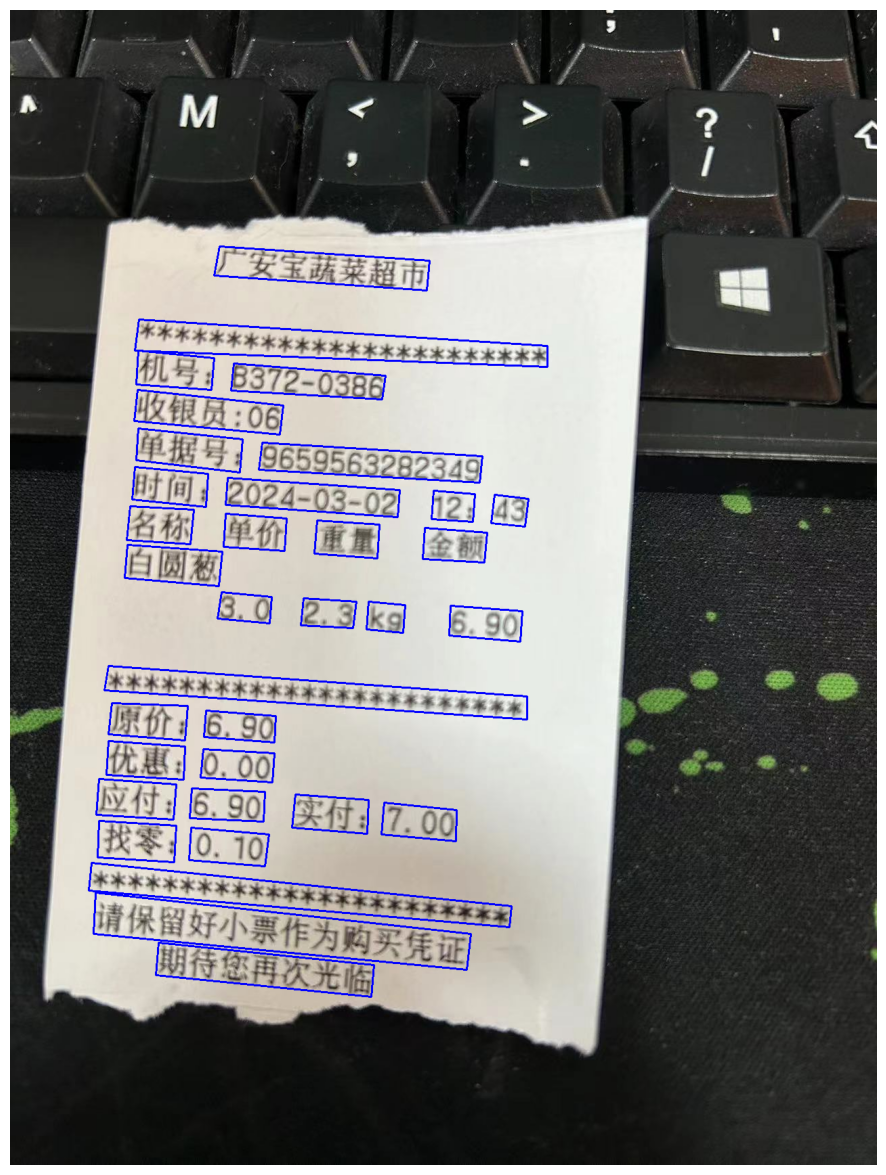

In [38]:
coco_segmentation_visualization()